In [ ]:
#PreLab # 7. API's



In [ ]:
# API = Application Programming Interface

In [1]:
#Weather API

import requests
import json

lat = "42.098701"
lon = "-75.912537"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

#how would we open up forecast? It's in a nested dicitonary so we must open properties as well

forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json = new_request.json()
json



{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-20T16:43:35+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-20T17:32:12+00:00',
  'updateTime': '2023-03-20T16:43:35+00:00',
  'validTimes': '2023-03-20T10:00:00+00:00/P7DT15H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'This Afternoon',
    'startTime': '2023-03-20T13:00:00-04:00',
    'endTime': '2023-03-20T18:00:00-04:00',

In [5]:
#acess the forecast and print off the day temperature, and detailed forecast

import requests
import json

lat = "42.098701"
lon = "-75.912537"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

#how would we open up forecast? It's in a nested dicitonary so we must open properties as well

forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json = new_request.json()
json

a = json["properties"]["periods"]
a

for i in a:
    name = i["name"]
    temp = i["temperature"]
    detail = i["detailedForecast"]
    print(name)
    print(temp)
    print(detail)

This Afternoon
52
Sunny, with a high near 52. West wind around 12 mph.
Tonight
30
Mostly clear, with a low around 30. Southwest wind 5 to 9 mph.
Tuesday
55
Mostly sunny, with a high near 55. Southwest wind 6 to 10 mph.
Tuesday Night
33
Mostly cloudy, with a low around 33. Southeast wind 2 to 8 mph.
Wednesday
56
A slight chance of rain showers after 2pm. Mostly cloudy, with a high near 56. Southeast wind 2 to 10 mph. Chance of precipitation is 20%.
Wednesday Night
44
A chance of rain showers. Mostly cloudy, with a low around 44. Chance of precipitation is 40%.
Thursday
60
Rain showers likely. Cloudy, with a high near 60. Chance of precipitation is 70%.
Thursday Night
38
Rain showers likely. Cloudy, with a low around 38. Chance of precipitation is 70%.
Friday
47
A chance of rain showers. Cloudy, with a high near 47. Chance of precipitation is 50%.
Friday Night
34
A chance of rain before 1am, then a chance of rain and snow. Mostly cloudy, with a low around 34. Chance of precipitation is 5

In [6]:
#Postlab 7
#Use our weather data we covered in Monday’s class and covert those three elements (day, temp, description) into a CSV (1pt). 


import requests
import json
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

csv_file = open("lab_7_weather_data", "w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["day","temperature","description"])

latitude = "42.098701"
longitude = "-75.912537"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()

forecast= json_file["properties"]["forecast"]
u_request = requests.get(forecast)
json = new_request.json()

days = json["properties"]["periods"]
for i in days:
    name =i['name']
    temp= int(i['temperature'])
    desc = i["detailedForecast"]
    csv_writer.writerow([name,temp,desc])
    
csv_file.close()

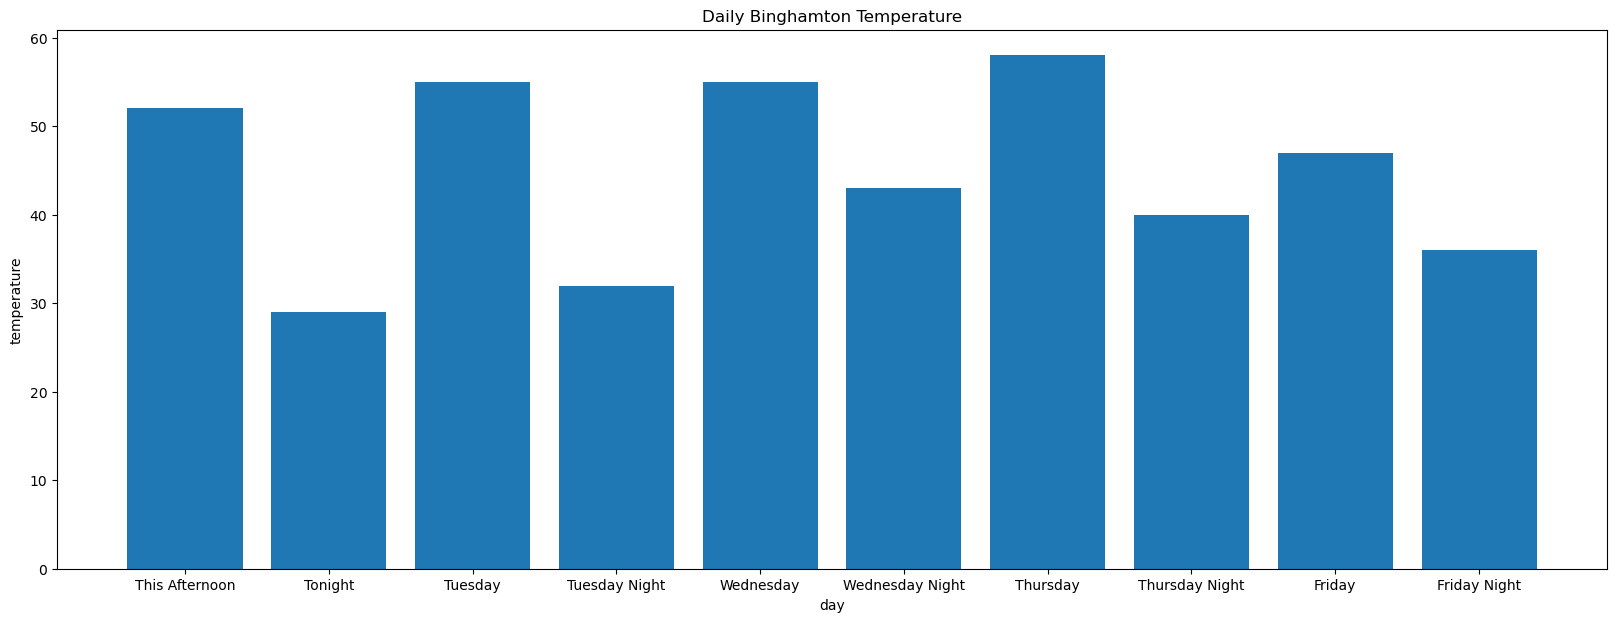

In [14]:
#Using the techniques covered in this slide deck, convert that CSV into a bar graph
# y axis should be the temperature, x axis should be the day (3pts)
#Bonus (1pt) figure out how to make the days from the weather graph not crowd each other on the x axis.
#Comment the source you used 

weather_sheet = pd.read_csv("lab_7_weather_data")
df = pd.DataFrame(weather_sheet)
temp = df["temperature"]
day = df["day"]
figure = plt.figure(figsize = (20, 7))
plt.bar(day[0:10], temp[0:10])

plt.xlabel("day")
plt.ylabel("temperature")
plt.title("Daily Binghamton Temperature")

plt.show()

#https://stackoverflow.com/questions/20398920/physically-stretch-plot-in-horizontal-direction-in-python
#The website I used was discovered by my friend not me.

In [22]:
# Read through the documentation of this public holiday API. 
#There are seven different calls listed there, use all seven of them. 
#Use comments to explain how the API is working & what each call is accomplishing. (You’ll need to use country codes) (4pts). 

country_code = "EG" #Setting up our countries code
year = 2018 #setting up our year
url = "https://date.nager.at/api/v3/" #url is set up to be used for every call

calls = [f"CountryInfo/{country_code}", #Calls for country info
        "AvailableCountries", # calls for all the countries
        f"LongWeekend/{year}/{country_code}", #calls for extended weekends
        f"PublicHolidays/{year}/{country_code}", #calls for public holidays
        f"NextPublicHolidays/{country_code}", #calls for the upcoming holiday
        "NextPublicHolidaysWorldwide", #calls for next holiday in multiole places
        f"IsTodayPublicHoliday/{country_code}"] #checks the current day for a holiday

try:
    for i in calls: #iterates through the list
        public_holiday = requests.get(url + i) #finishes our url
        json_file = public_holiday.json() # places into a json file
        print(json_file) #lets us see
        print( )# idea inspired by friend. Makes it much easier to read. Also the list.
        
except ValueError: #lets our program have a response to a lack of holiday on a day
    print("No fun today")

{'commonName': 'Egypt', 'officialName': 'Arab Republic of Egypt', 'countryCode': 'EG', 'region': 'Africa', 'borders': [{'commonName': 'Israel', 'officialName': 'State of Israel', 'countryCode': 'IL', 'region': 'Asia', 'borders': None}, {'commonName': 'Libya', 'officialName': 'State of Libya', 'countryCode': 'LY', 'region': 'Africa', 'borders': None}, {'commonName': 'Sudan', 'officialName': 'Republic of the Sudan', 'countryCode': 'SD', 'region': 'Africa', 'borders': None}]}

[{'countryCode': 'AD', 'name': 'Andorra'}, {'countryCode': 'AL', 'name': 'Albania'}, {'countryCode': 'AR', 'name': 'Argentina'}, {'countryCode': 'AT', 'name': 'Austria'}, {'countryCode': 'AU', 'name': 'Australia'}, {'countryCode': 'AX', 'name': 'Åland Islands'}, {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'}, {'countryCode': 'BB', 'name': 'Barbados'}, {'countryCode': 'BE', 'name': 'Belgium'}, {'countryCode': 'BG', 'name': 'Bulgaria'}, {'countryCode': 'BJ', 'name': 'Benin'}, {'countryCode': 'BO', 'name': 'Bo

No fun today


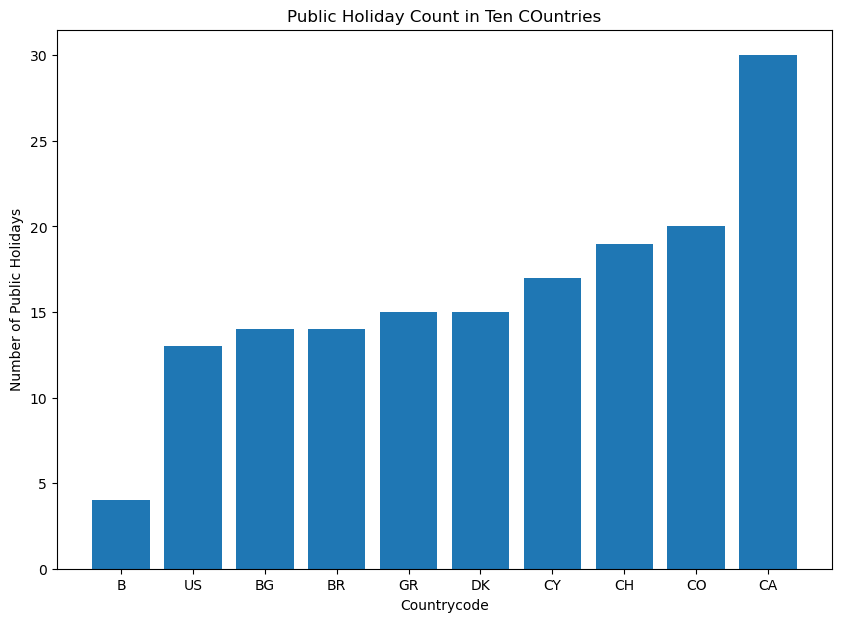

In [3]:
#Then I want you to build a program that gets public holiday info from 10 countries of your choosing in an efficient way.  
#Count the total number of holidays and store that info. (3pts) 
#Be careful, some countries might not have holidays listed in the API!
#Bonus (2pts) create a bar graph to visualize the number of public holidays in the 10 countries you counted 

countrycode = ["US","CA","CY","CO","CH","BG","BR","B","GR","DK"]
year = "2023"
csv_file = open("public_holiday","w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Countrycode", "Total Holidays"])

for i in countrycode:
    url = f"https://date.nager.at/api/v3/PublicHolidays/{year}/{i}"
    public_holiday = requests.get(url)
    json_file = public_holiday.json()
    holiday_number = len(json_file)
    csv_writer.writerow([i, holiday_number])
csv_file.close()

holiday_sheet = pd.read_csv("Public_Holiday")
holiday_sheet = holiday_sheet.sort_values(by="Total Holidays", ascending = True)
df = pd.DataFrame(holiday_sheet)
holiday = df["Total Holidays"]
countrycode = df["Countrycode"]

figure = plt.figure(figsize = (10, 7))
plt.bar(countrycode[0:10], holiday[0:10])

plt.title("Public Holiday Count in Ten COuntries")
plt.xlabel("Countrycode")
plt.ylabel("Number of Public Holidays")

plt.show()
